<a href="https://colab.research.google.com/github/NombuleloZizi/Project2/blob/main/Nombulelo_Zizi_Project2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Import Libraries**

In [90]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from seaborn import heatmap
from sklearn.ensemble import RandomForestClassifier
# Classification Metrics
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram')
set_config(transform_output='pandas')



## **2. Project 2: Part 1**

- Author: Nombulelo Zizi

### 2.1 First choice: Stroke Prediction Dataset

#### 2.1.1 Load and inspect data

In [91]:
stroke_url = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv"
df_stroke = pd.read_csv(stroke_url)
df_stroke.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [92]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### 2.1.2 Stroke dataset

1. Source of data

 - [Stroke prediction dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)


2. Brief description of data

  - This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

3. What is the target?

  - Stroke

5. Is this a classification or regression problem?

  - Classification

6. How many features does the data have?

  - We have a totla off 12 columns/features.

7. How many rows are in the dataset?

  - 5110

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

  - We need to drop unwanted columns, remove duplicates rows and impute missing values


### 2.2 Second choice: Car Insurance Data

#### 2.2.1 Load and inspect data

In [93]:
car_insurance_url = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/Car_Insurance_Claim.csv"
df_car_insurance = pd.read_csv(car_insurance_url)
df_car_insurance.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [94]:
df_car_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

#### 2.2.2 Car Insurance Data

1. Source of data

 - [Car Insurance Data](https://www.kaggle.com/datasets/sagnik1511/car-insurance-data)


2. Brief description of data

  - The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data..

3. What is the target?

  - Outcome

5. Is this a classification or regression problem?

  - Classification

6. How many features does the data have?

  - We have a total off 18 columns/features.

7. How many rows are in the dataset?

  - 10000

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

  - We need to drop unwanted columns, remove duplicates rows and impute missing values


## **3. Project 2: Part 2**



*   I'm working for a insurance company, so would like to use Insurance dataset



### 3.1 Car Insurance Data

In [95]:
# Create a copy of the dataset for Modeling
df_car_insurance._ml = df_car_insurance.copy()

<ipython-input-95-1a9bd43d6d4d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_car_insurance._ml = df_car_insurance.copy()


#### 3.2.1 Clean the Data

In [96]:
# convert column names to lower case to make them easier to remember.

df_car_insurance.columns = df_car_insurance.columns.str.lower()
df_car_insurance.columns

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

##### Remove unnecessary columns

In [97]:
# remove unnecessary columns
df_car_insurance.drop(columns=['id'], inplace=True)
df_car_insurance.columns

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

##### Remove duplicates rows

In [98]:
# Display the number of duplicate rows in the dataset
print(f'There are {df_car_insurance.duplicated().sum()} duplicate rows.')

There are 12 duplicate rows.


##### **Missing Values**

In [99]:
df_car_insurance.dtypes

age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object

In [100]:
# Display the total number of missing values
print(f'There are {df_car_insurance.isna().sum().sum()} missing values.')

There are 1939 missing values.


In [101]:
null_sums = df_car_insurance.isna().sum()
null_sums

age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

In [102]:
# Let's investigate the rows with missing information
df_car_insurance.loc[df_car_insurance.isna().any(axis=1)]

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
13,16-25,female,majority,0-9y,university,upper class,0.591260,1.0,before 2015,0.0,1.0,10238,NaN,sedan,0,0,0,0.0
15,26-39,female,majority,0-9y,high school,upper class,0.762798,0.0,after 2015,1.0,0.0,10238,NaN,sedan,0,0,0,0.0
16,65+,male,majority,30y+,university,upper class,0.796175,1.0,before 2015,1.0,1.0,32765,NaN,sedan,10,2,1,0.0
17,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,1.0,0.0,32765,12000.0,sedan,0,0,0,1.0
18,26-39,female,majority,0-9y,university,upper class,0.680594,1.0,before 2015,0.0,1.0,32765,NaN,sedan,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,65+,male,minority,0-9y,none,upper class,0.710640,1.0,after 2015,0.0,1.0,32765,NaN,sedan,0,0,0,0.0
9981,26-39,male,majority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
9985,16-25,male,minority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
9988,26-39,male,majority,10-19y,high school,poverty,NaN,0.0,before 2015,0.0,0.0,10238,NaN,sedan,1,0,2,1.0


In [103]:
## Obtain summary statistics
df_car_insurance.select_dtypes('number').describe()

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Based on my finding, I will go with the safe option of using `mean` to fill in the missing values in the bmi column.

In [104]:
df_car_insurance['credit_score'] = df_car_insurance['credit_score'].fillna(df_car_insurance['credit_score'].mean())


In [105]:
df_car_insurance['annual_mileage'] = df_car_insurance['annual_mileage'].fillna(df_car_insurance['annual_mileage'].mean())


In [106]:
## check missing values
df_car_insurance.isna().sum()

age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

##### **Incosistency Values**

In [107]:
## check all the objects columns names
#dtypes_insurance = df_car_insurance.dtypes
#str_cols_insurance = df_car_insurance[dtypes_insurance=='object'].index
#str_cols_insurance

cat_cols_insurance = df_car_insurance.select_dtypes('object').columns
cat_cols_insurance

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object')

In [108]:
## Obtain the value counts for all string columns
## Obtain the value counts for all string columns
for col in cat_cols_insurance:
  print(f"Value Counts for {col}")
  print(df_car_insurance[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for age
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: age, dtype: int64


Value Counts for gender
female    5010
male      4990
Name: gender, dtype: int64


Value Counts for race
majority    9012
minority     988
Name: race, dtype: int64


Value Counts for driving_experience
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: driving_experience, dtype: int64


Value Counts for education
high school    4157
university     3928
none           1915
Name: education, dtype: int64


Value Counts for income
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: income, dtype: int64


Value Counts for vehicle_year
before 2015    6967
after 2015     3033
Name: vehicle_year, dtype: int64


Value Counts for vehicle_type
sedan         9523
sports car     477
Name: vehicle_type, dtype: int64




#### **3.2.2 Univariate**

##### Male vs Female

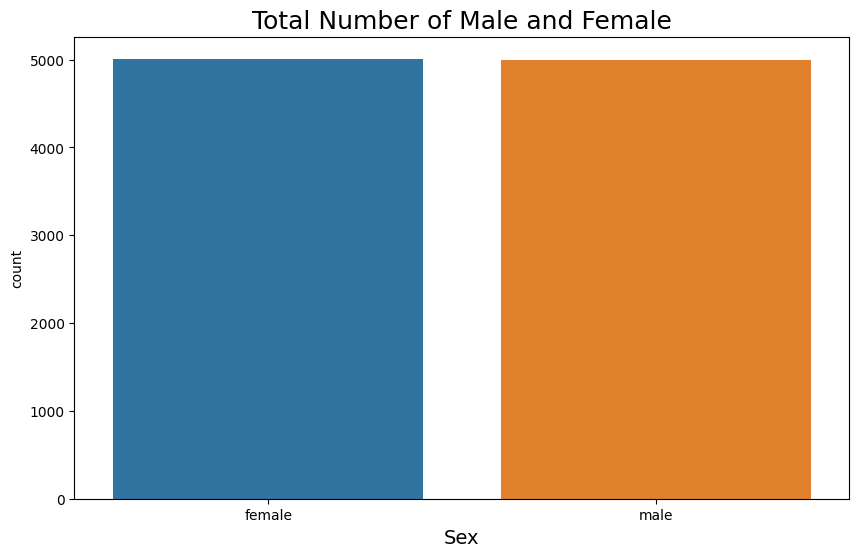

In [109]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'gender', data = df_car_insurance)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

##### vichle types

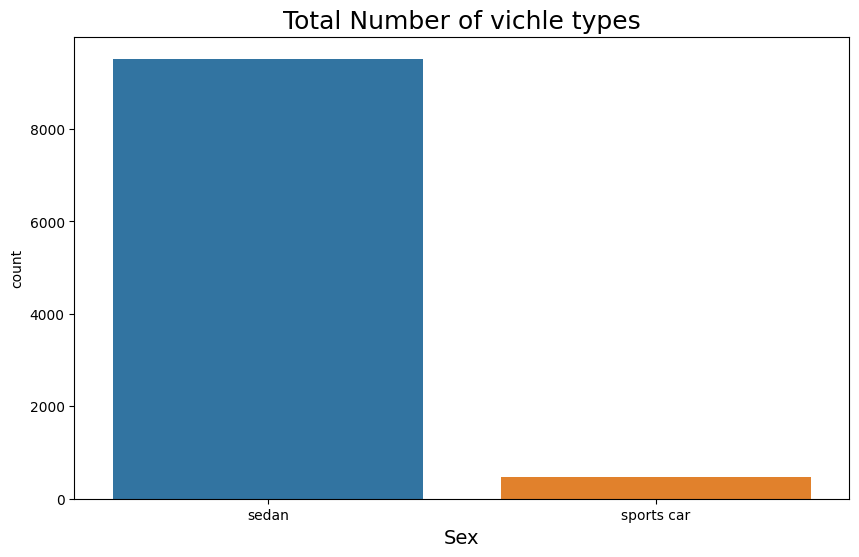

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'vehicle_type', data = df_car_insurance)
plt.title('Total Number of vichle types',size=18)
plt.xlabel('Sex',size=14)
plt.show()

##### Age Distribution

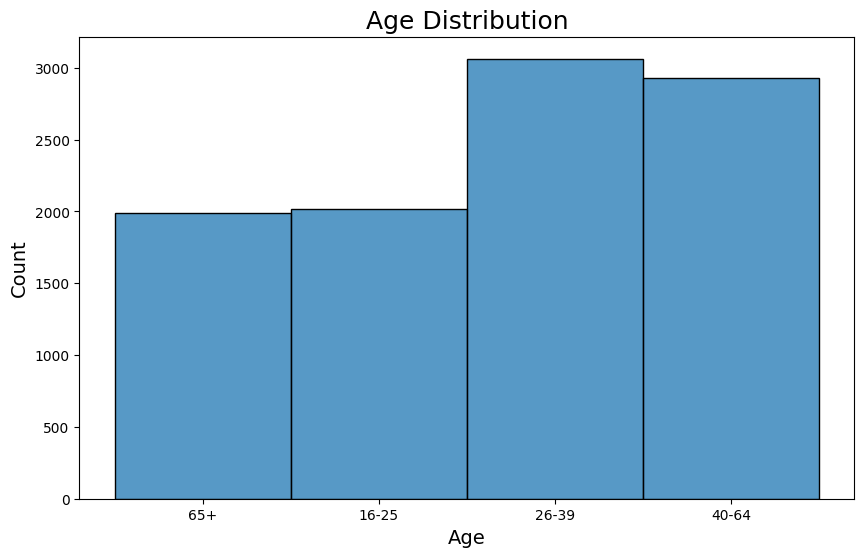

In [111]:
plt.figure(figsize=(10,6))
sns.histplot(df_car_insurance.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

##### Education

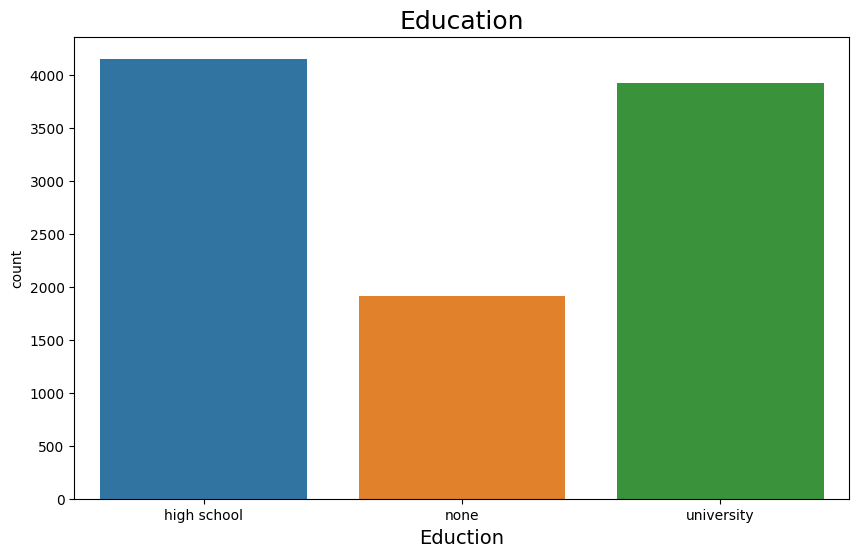

In [112]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'education', data = df_car_insurance)
plt.title('Education',size=18)
plt.xlabel('Eduction',size=14)
plt.show()

##### Income

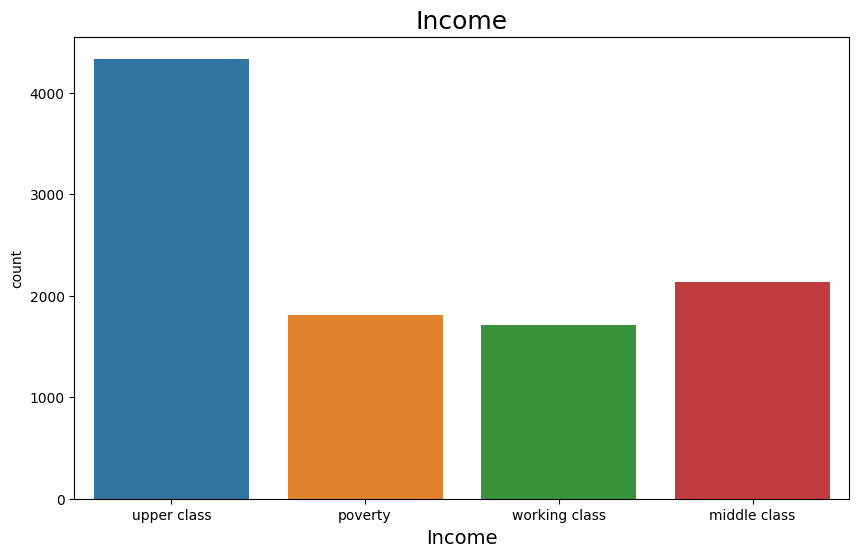

In [113]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'income', data = df_car_insurance)
plt.title('Income',size=18)
plt.xlabel('Income',size=14)
plt.show()

##### Vehicle year

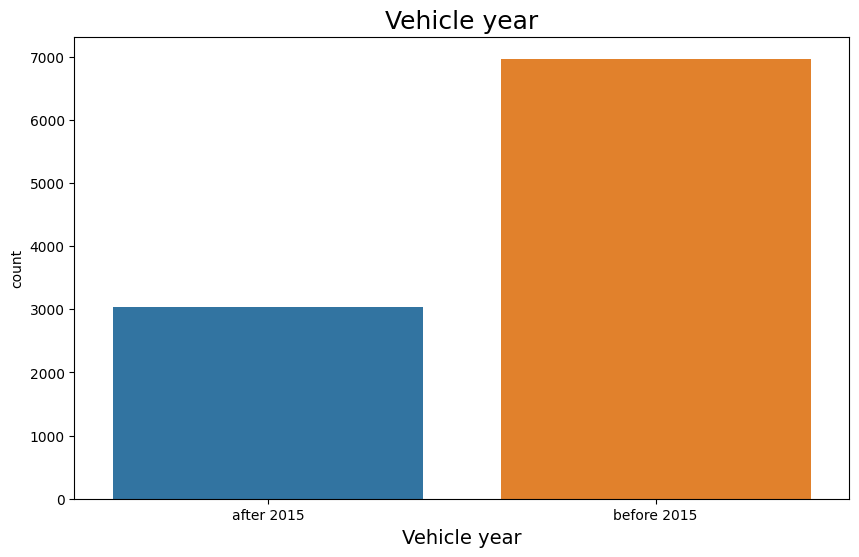

In [114]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'vehicle_year', data = df_car_insurance)
plt.title('Vehicle year',size=18)
plt.xlabel('Vehicle year',size=14)
plt.show()

##### Driving Experience

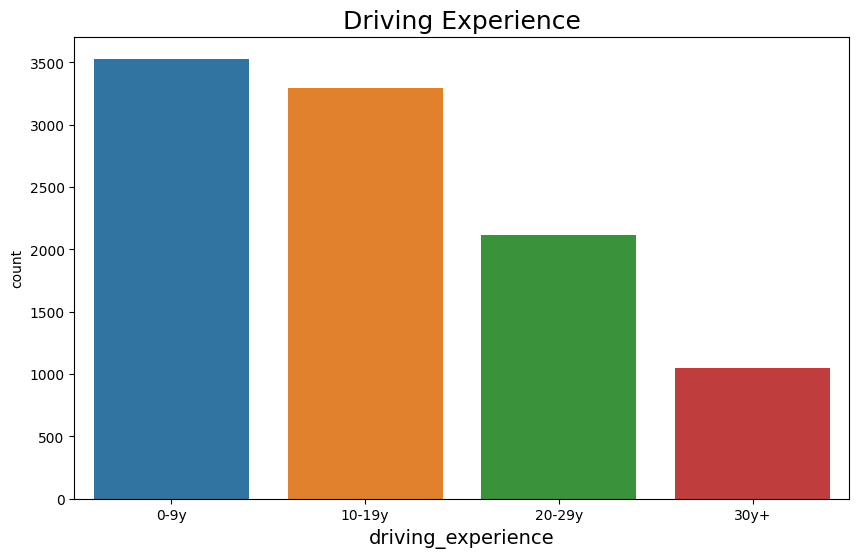

In [115]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'driving_experience', data = df_car_insurance)
plt.title('Driving Experience',size=18)
plt.xlabel('driving_experience',size=14)
plt.show()

##### Outcome vs Postal code

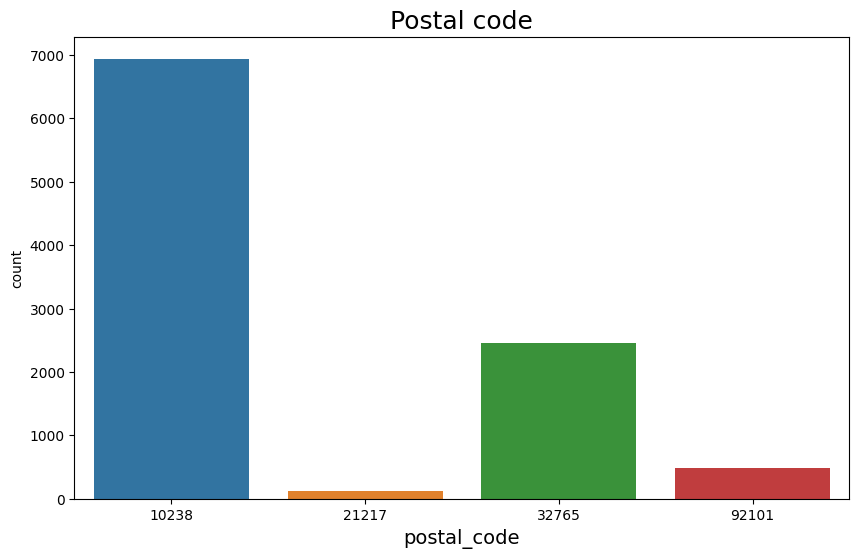

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'postal_code', data = df_car_insurance)
plt.title('Postal code',size=18)
plt.xlabel('postal_code',size=14)
plt.show()

#### **3.1.3 Outliners**

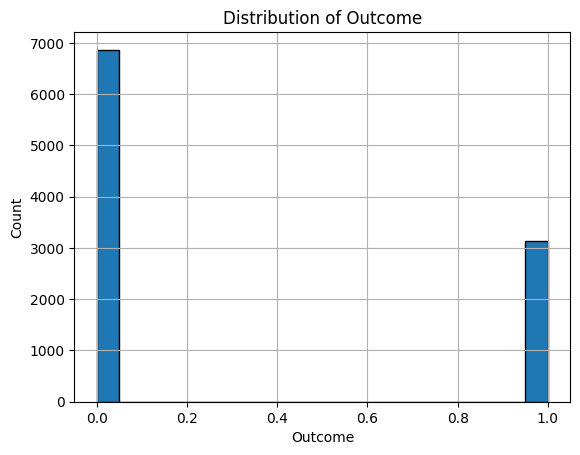

In [117]:
# Create the histogram
ax = df_car_insurance['outcome'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of Outcome')
ax.set_xlabel('Outcome')
ax.set_ylabel('Count');

## **3. Project 2: Part 3**

### Moderate or strong correlations

In [118]:
# Get correlations
corr = df_car_insurance.corr(numeric_only = True)
corr.round(2)

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
credit_score,1.00,0.30,0.27,0.21,0.01,-0.16,0.19,0.12,0.17,-0.31
vehicle_ownership,0.30,1.00,0.18,0.13,-0.00,-0.09,0.13,0.09,0.12,-0.38
married,0.27,0.18,1.00,0.29,0.01,-0.44,0.22,0.12,0.22,-0.26
children,0.21,0.13,0.29,1.00,0.02,-0.43,0.22,0.12,0.21,-0.23
postal_code,0.01,-0.00,0.01,0.02,1.00,-0.13,0.11,0.04,-0.12,0.10
annual_mileage,-0.16,-0.09,-0.44,-0.43,-0.13,1.00,-0.31,-0.11,-0.19,0.18
speeding_violations,0.19,0.13,0.22,0.22,0.11,-0.31,1.00,0.36,0.44,-0.29
duis,0.12,0.09,0.12,0.12,0.04,-0.11,0.36,1.00,0.26,-0.19
past_accidents,0.17,0.12,0.22,0.21,-0.12,-0.19,0.44,0.26,1.00,-0.31
outcome,-0.31,-0.38,-0.26,-0.23,0.10,0.18,-0.29,-0.19,-0.31,1.00


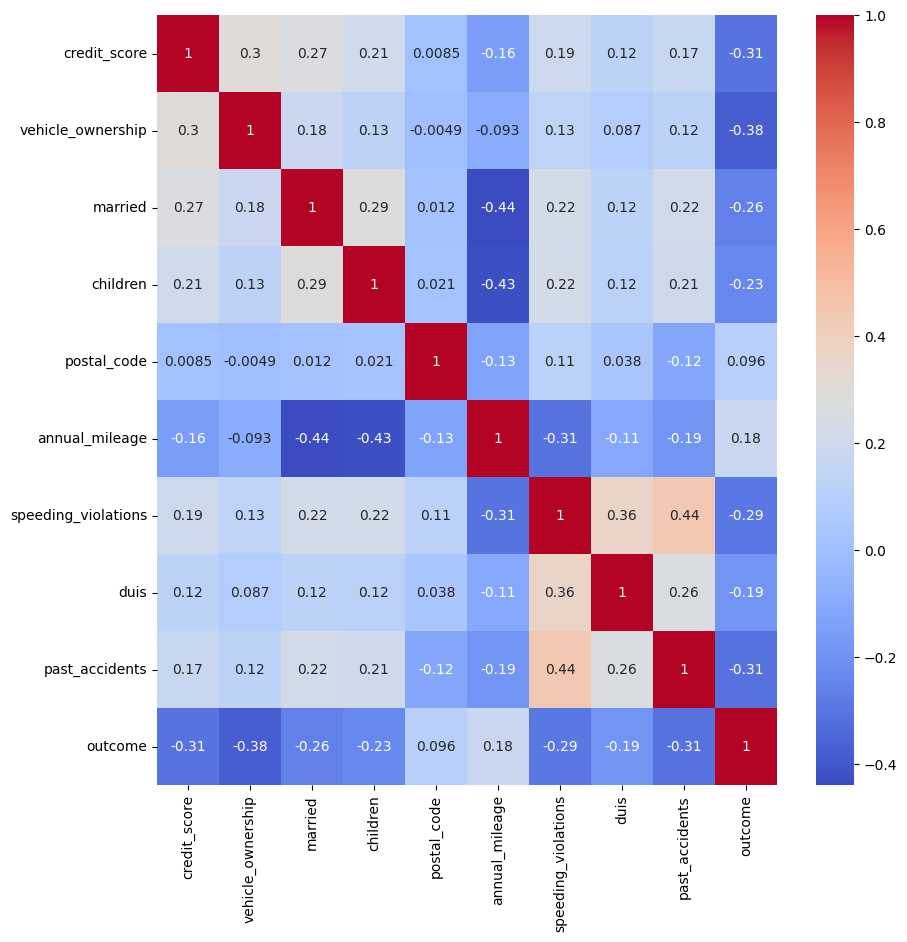

In [119]:
# Make a heatmap of correlations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

### Multivariate

##### Age vs Speeding violations grouped by Driving experience

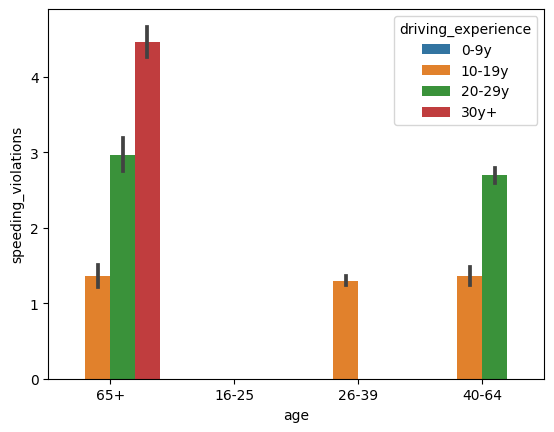

In [120]:

ax = sns.barplot(data=df_car_insurance, x='age',y='speeding_violations', hue='driving_experience')

##### Experience vs Speeding violations

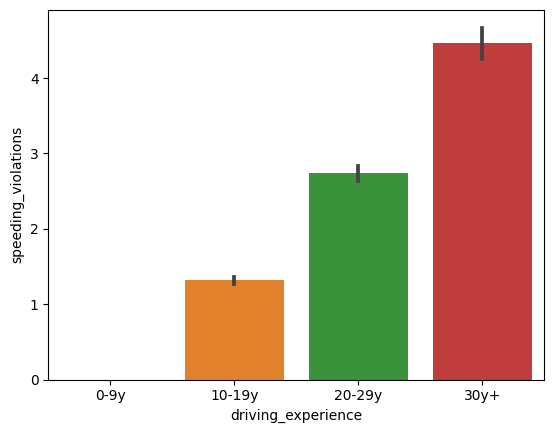

In [121]:

ax = sns.barplot(data=df_car_insurance, x='driving_experience',y='speeding_violations')

##### Violation by vehicle type

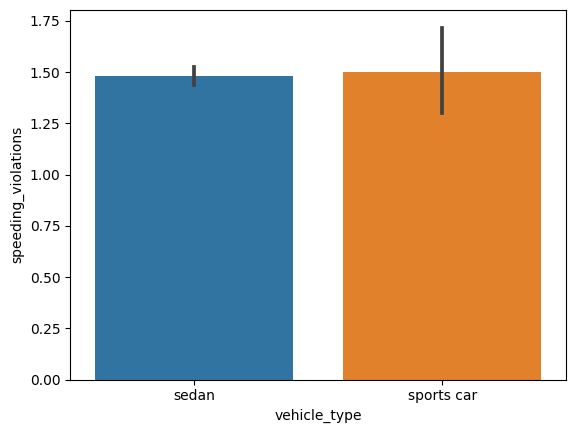

In [122]:

ax = sns.barplot(data=df_car_insurance, y='speeding_violations',x='vehicle_type')

##### Gender by speeding violation

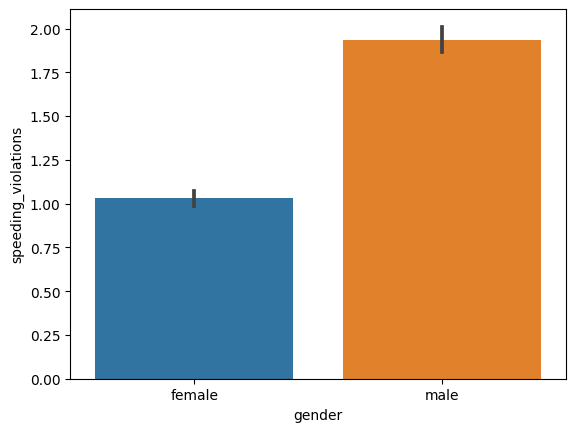

In [123]:

ax = sns.barplot(data=df_car_insurance, x='gender', y='speeding_violations')

##### Gender by credit scrore

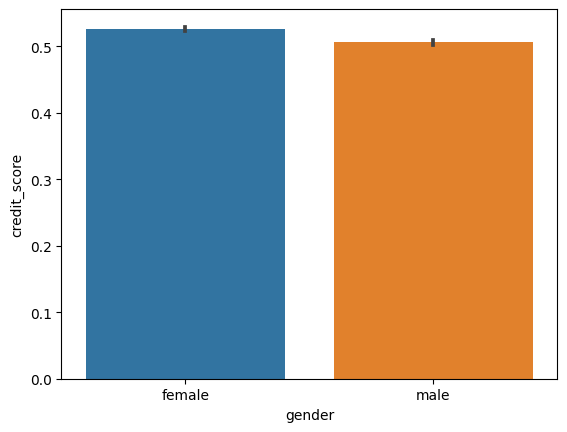

In [124]:

ax = sns.barplot(data=df_car_insurance, x='gender', y='credit_score')

##### Age vs past accidents group by Driving experience

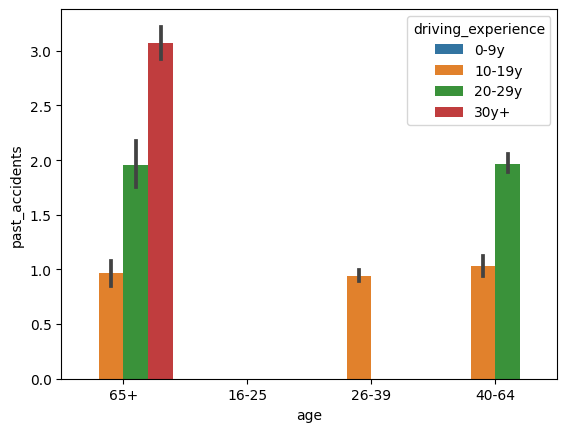

In [125]:

ax = sns.barplot(data=df_car_insurance, x='age', y='past_accidents', hue='driving_experience')

##### Driving experience vs annual mileage

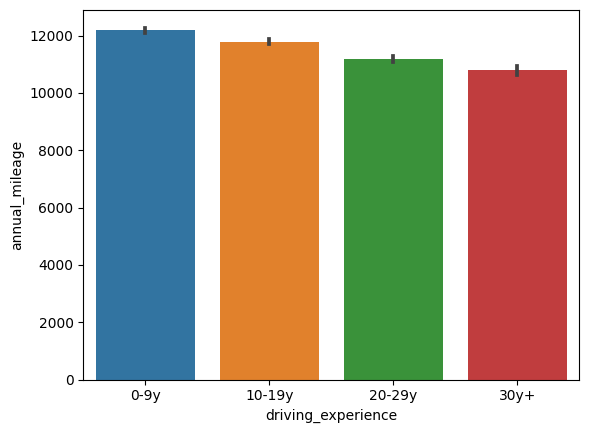

In [126]:


ax = sns.barplot(data=df_car_insurance, x='driving_experience', y='annual_mileage')

### Two Visualization

#### Age vs past accidents group by Driving experience

Text(0.5, 1.0, 'Age vs past accidents group by Driving experience')

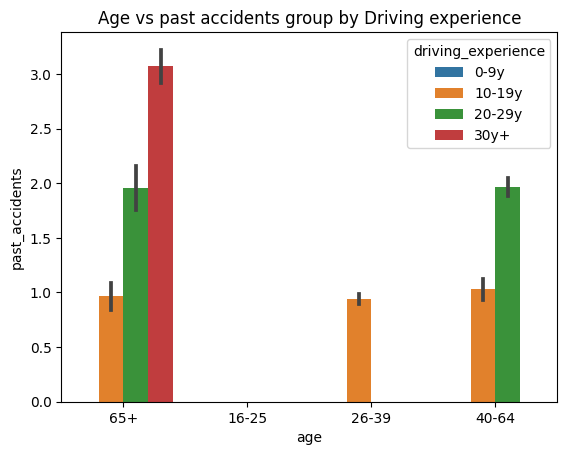

In [127]:
# Using seaborn to plot the group means Age vs past accidents group by Driving experience
ax = sns.barplot(data=df_car_insurance, x='age', y='past_accidents', hue='driving_experience')
ax.set_title("Age vs past accidents group by Driving experience")

We see that the outcome is high on males that have 0-9 years of driving experience

#### Age vs Speeding violations grouped by Driving experience

Text(0.5, 1.0, 'Age vs Speeding violations grouped by Driving experience')

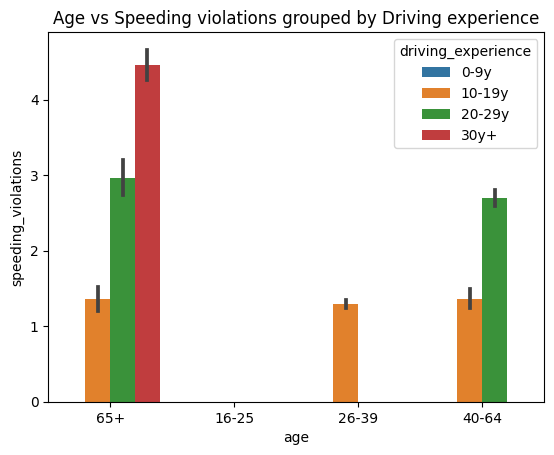

In [128]:
ax = sns.barplot(data=df_car_insurance, x='age',y='speeding_violations', hue='driving_experience')
ax.set_title("Age vs Speeding violations grouped by Driving experience")

## **4. Project 2: Part 4**

## **4.1 Model Validation Data Split**

### **Create a Copy of the Dataset**

In [129]:
# Create a copy of the dataset for Modeling
df_ml = df_car_insurance.copy()

### **Check Class Balance**

In [130]:
# Check how many samples of each class are present
df_ml['outcome'].value_counts(normalize=True)

0.0    0.6867
1.0    0.3133
Name: outcome, dtype: float64

### **Split the Data**

In [131]:
# Define features (X) and target (y)
target = 'outcome'
X = df_car_insurance.drop(columns=[target]).copy()
y = df_car_insurance[target].copy()


In [132]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [133]:
# baseline
y_test.value_counts(normalize = True)

0.0    0.6868
1.0    0.3132
Name: outcome, dtype: float64

### **Prepare the data appropriately for modeling:**

### Summary Statistics for Numeric Features

In [134]:
## Saving list of column names for numeric cols
num_cols = df_car_insurance.select_dtypes('number').columns
num_cols

Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accidents', 'outcome'],
      dtype='object')

In [135]:
## For any numerical columns, obtain the summary statistics of each (min, max, mean).
for col in num_cols:
  print(f"Summary statistics for {col}:")
  print(df_car_insurance[col].describe())
  # Increasing readability by adding an empty line
  print('\n')

Summary statistics for credit_score:
count    10000.000000
mean         0.515813
std          0.130752
min          0.053358
25%          0.431509
50%          0.515813
75%          0.607607
max          0.960819
Name: credit_score, dtype: float64


Summary statistics for vehicle_ownership:
count    10000.000000
mean         0.697000
std          0.459578
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: vehicle_ownership, dtype: float64


Summary statistics for married:
count    10000.000000
mean         0.498200
std          0.500022
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: married, dtype: float64


Summary statistics for children:
count    10000.000000
mean         0.688800
std          0.463008
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: children, dtype: float64


Summary 

### Inspecting Categorical Columns & Addressing Inconsistent Values

In [136]:
## check all the objects columns names
dtypes = df_car_insurance.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object')

In [137]:
## Obtain the value counts for all string columns
for col in str_cols:
  print(f"Value Counts for {col}")
  print(df_car_insurance[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for age
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: age, dtype: int64


Value Counts for gender
female    5010
male      4990
Name: gender, dtype: int64


Value Counts for race
majority    9012
minority     988
Name: race, dtype: int64


Value Counts for driving_experience
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: driving_experience, dtype: int64


Value Counts for education
high school    4157
university     3928
none           1915
Name: education, dtype: int64


Value Counts for income
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: income, dtype: int64


Value Counts for vehicle_year
before 2015    6967
after 2015     3033
Name: vehicle_year, dtype: int64


Value Counts for vehicle_type
sedan         9523
sports car     477
Name: vehicle_type, dtype: int64




#### Creating the Pipelines and Tuples for Each Group of Columns

Data is divided into the following:

- numeric - age and na_to_k
- nominal categorical - gender
- ordinal categorical columns - BP and cholesterol

#### **Numeric Transformation**

In [138]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA

# Transformers
mean_imputer = SimpleImputer(strategy='most_frequent')
# scaler
scaler = StandardScaler()

# Save list of number column names
num_cols = X_train.select_dtypes("number").columns

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Tuple
numeric_tuple = ('numeric',num_pipeline, num_cols)
num_cols

Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accidents'],
      dtype='object')

#### **Nominal Transformation**

In [139]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA

# Ordered Category Lists
nominal_cols = X_train.select_dtypes('object').columns

# Transformers
ohe_imputer = SimpleImputer(strategy='most_frequent',fill_value = "NA")
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Pipeline
nom_pipeline = make_pipeline(ohe_imputer, ohe)

# Tuple
ohe_tuple = ('categorical',nom_pipeline, nominal_cols)

### Preprocesing

In [140]:
# Instantiate the make column transformer
preprocessor = ColumnTransformer([numeric_tuple,
                                       ohe_tuple],
                                       remainder='drop', verbose_feature_names_out=False)


In [141]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accidents'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [142]:
# Transform the training data
X_train_processed = preprocessor.transform(X_train)
# Transform the testing data
X_test_processed = preprocessor.transform(X_test)
# View the processed training data
X_train_processed.head()

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,age_16-25,age_26-39,age_40-64,age_65+,gender_female,gender_male,race_majority,race_minority,driving_experience_0-9y,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_high school,education_none,education_university,income_middle class,income_poverty,income_upper class,income_working class,vehicle_year_after 2015,vehicle_year_before 2015,vehicle_type_sedan,vehicle_type_sports car
4214,0.003786,0.657149,1.013694,-1.480368,-0.503933,-0.263821,0.241003,-0.428644,-0.642385,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1064,-0.927571,0.657149,-0.986491,0.675508,0.694281,-0.263821,-0.208294,-0.428644,-0.033759,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4885,0.513349,0.657149,1.013694,0.675508,-0.503933,0.106841,0.690300,3.127583,1.792122,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3520,-0.559914,0.657149,1.013694,0.675508,0.694281,-1.746470,2.038190,-0.428644,-0.033759,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1249,-0.968248,0.657149,1.013694,0.675508,-0.503933,0.106841,-0.657591,-0.428644,3.009376,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## **4.2. Multiples models:**

In [143]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(15, 15))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=40)
  plt.ylabel('True', fontsize=40)
  plt.show()

### **KNN Model**

In [144]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accidents'],
      dtype='object')),...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

### **KNN Model Evaluation**

In [145]:
## Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
## Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [146]:
## print the classification reports
labels = ['1','0']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

           1       0.90      0.91      0.90      5150
           0       0.80      0.77      0.79      2350

    accuracy                           0.87      7500
   macro avg       0.85      0.84      0.85      7500
weighted avg       0.87      0.87      0.87      7500

Test Report
              precision    recall  f1-score   support

           1       0.85      0.86      0.86      1717
           0       0.69      0.68      0.68       783

    accuracy                           0.80      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.80      0.80      0.80      2500



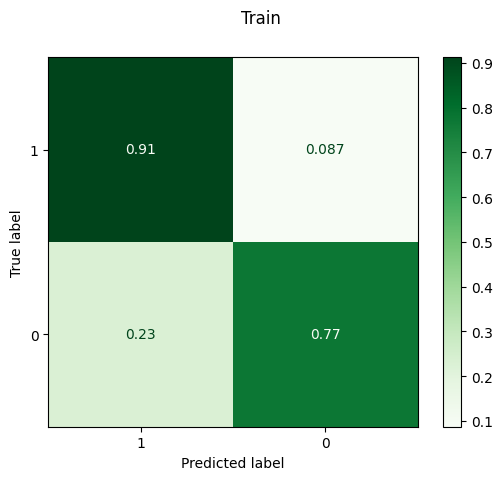

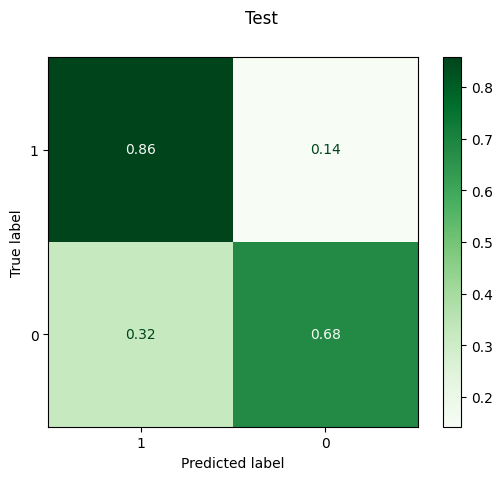

In [147]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Train');



ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Test');

#### Tune the Hyperparameters

In [148]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['credit_score', 'vehicle_ownership', 'married', 'children',
          'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
          'past_accidents'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='most_frequent')),
                                                    ('onehot

In [149]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [150]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accide...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [151]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 13,
 'kneighborsclassifier__weights': 'distance'}

In [152]:
knn_gs.best_score_

0.8286666666666667

In [153]:
best_knn = knn_gs.best_estimator_

In [154]:
#check the best parameter
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [155]:
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5150
         1.0       1.00      1.00      1.00      2350

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

Test
               precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1717
         1.0       0.71      0.67      0.69       783

    accuracy                           0.81      2500
   macro avg       0.78      0.77      0.78      2500
weighted avg       0.81      0.81      0.81      2500



Text(0.5, 1.0, 'Test CM')

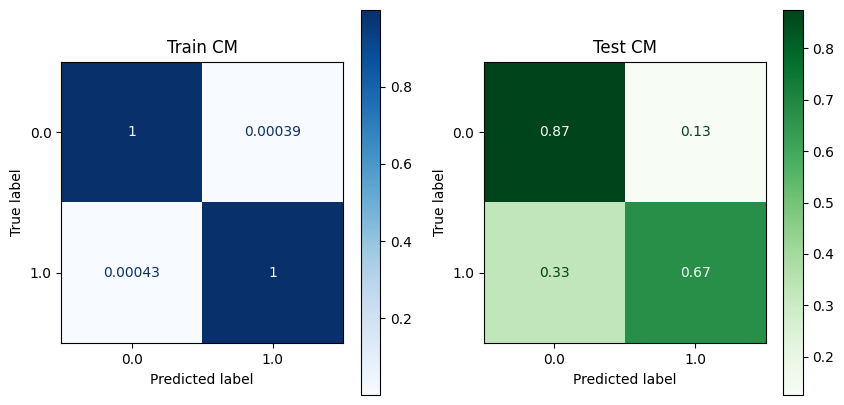

In [156]:
# Check the class balance again to help us choose a metric
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true')

axes[1].set_title('Test CM')


### Logistic Regression Model

In [157]:
lr = LogisticRegression(random_state =42)
lr_pipe = make_pipeline(preprocessor, lr)
lr_pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accidents'],
      dtype='object')),...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

### **Logistic Model Evaluation**

In [158]:
## Save the model's predictions for the train dataset
lr_train_preds = lr_pipe.predict(X_train)
## Save the model's predictions for the test dataset
lr_test_preds = lr_pipe.predict(X_test)

In [159]:
## print the classification reports
labels = ['1','0']
print('Train Report')
print(classification_report(y_train, lr_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lr_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

           1       0.88      0.90      0.89      5150
           0       0.77      0.73      0.75      2350

    accuracy                           0.85      7500
   macro avg       0.83      0.81      0.82      7500
weighted avg       0.85      0.85      0.85      7500

Test Report
              precision    recall  f1-score   support

           1       0.88      0.88      0.88      1717
           0       0.74      0.74      0.74       783

    accuracy                           0.84      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



#### Tune the Hyperparameters

In [160]:
# Display the hyperparameters.
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['credit_score', 'vehicle_ownership', 'married', 'children',
          'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
          'past_accidents'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='most_frequent')),
                                                    ('onehot

In [161]:
# Create a dictionary of parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [162]:
# Tune hyperparameters with GridSearchCV
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accide...
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [163]:
lr_gs.best_params_

{'logisticregression__C': 10}

In [164]:
best_lr = lr_gs.best_estimator_

In [165]:
#check the best parameter
# Instantiate and fit GridSearchCV
train_preds_lr = lr_pipe.predict(X_train)
test_preds_lr = lr_pipe.predict(X_test)

In [166]:
print('Train\n', classification_report(y_train, train_preds_lr))
print('Test\n', classification_report(y_test, test_preds_lr))

Train
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5150
         1.0       0.77      0.73      0.75      2350

    accuracy                           0.85      7500
   macro avg       0.83      0.81      0.82      7500
weighted avg       0.85      0.85      0.85      7500

Test
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1717
         1.0       0.74      0.74      0.74       783

    accuracy                           0.84      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



Text(0.5, 1.0, 'Test CM')

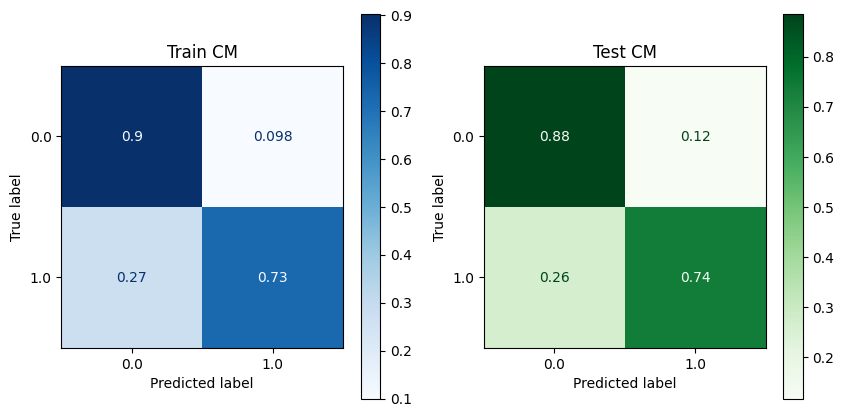

In [167]:
# Check the class balance again to help us choose a metric
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds_lr,
                                        ax=axes[0], cmap='Blues',normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_lr,
                                        ax=axes[1], cmap='Greens',normalize='true')

axes[1].set_title('Test CM')


### Decision Tree Classifier

In [168]:
dt = DecisionTreeClassifier()

dt_pipe = make_pipeline(preprocessor, dt)

dt_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accidents'],
      dtype='object')),...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### **Decision Tree Model Evaluation**

In [169]:
train_preds = dt_pipe.predict(X_train)
test_preds = dt_pipe.predict(X_test)

print('train')
print(classification_report(y_train, train_preds))

print('test')
print(classification_report(y_test, test_preds))

train
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5150
         1.0       1.00      1.00      1.00      2350

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

test
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      1717
         1.0       0.66      0.67      0.67       783

    accuracy                           0.79      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.79      0.79      0.79      2500



### Random Forest

In [170]:

# Instantiate default random forest model
rf = RandomForestClassifier(random_state = 42)

# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)


#Fit and evaluate the baseline model pipeline
rf_pipe.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accidents'],
      dtype='object')),...
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [171]:
rf_test_preds = rf_pipe.predict(X_test)
rf_train_preds = rf_pipe.predict(X_train)

## print the classification reports

labels = ['malignant','benign']
print('Train Report')
print(classification_report(y_train, rf_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, rf_test_preds, target_names=labels))

#ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize='true', cmap='Greens');

Train Report
              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00      5150
      benign       1.00      1.00      1.00      2350

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

Test Report
              precision    recall  f1-score   support

   malignant       0.86      0.88      0.87      1717
      benign       0.72      0.68      0.70       783

    accuracy                           0.82      2500
   macro avg       0.79      0.78      0.78      2500
weighted avg       0.81      0.82      0.82      2500



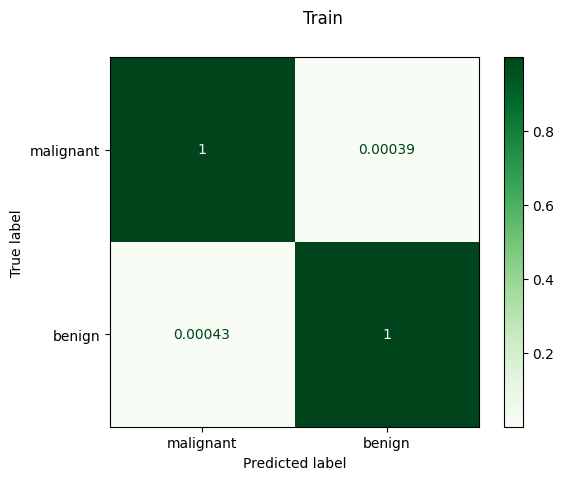

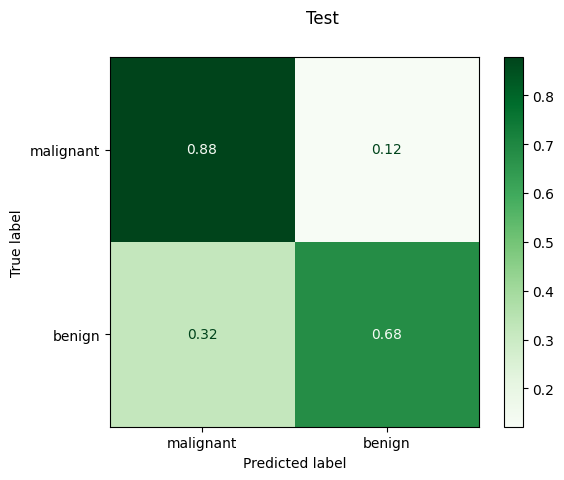

In [172]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, rf_train_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Train');



ConfusionMatrixDisplay.from_predictions(y_test, rf_test_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Test');

## **4.3. Apply PCA:**

In [173]:
# We must scale the data for use in PCA
scaler = StandardScaler()

# We are asking for the number of Principal Components that will retain 95% of the variance in the original features
pca = PCA(n_components = .95)

# Preprocessing Pipeline, so we can reuse it for other model types:
# We have only numeric data, so there is no need for a column transformer.
# We can perform the same processing steps on all columns.
pca_processing = make_pipeline(preprocessor, pca)

print('Shape before PCA:', X_train.shape)
print('Shape after PCA:', pca_processing.fit_transform(X_train).shape)
print('Column count reduced by: ', X_train.shape[1] - pca_processing.fit_transform(X_train).shape[1])



Shape before PCA: (7500, 17)
Shape after PCA: (7500, 17)
Column count reduced by:  0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### With PCA

In [174]:
%%time
# Now we will build the pipeline
knn_pca_pipe = make_pipeline(preprocessor, pca, knn)

# fit the pipeline
knn_pca_pipe.fit(X_train, y_train)

CPU times: user 122 ms, sys: 77.1 ms, total: 199 ms
Wall time: 119 ms


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accidents'],
      dtype='object')),...
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

         0.0       0.90      0.91      0.91      5150
         1.0       0.80      0.78      0.79      2350

    accuracy                           0.87      7500
   macro avg       0.85      0.84      0.85      7500
weighted avg       0.87      0.87      0.87      7500

Test Report:               precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1717
         1.0       0.69      0.67      0.68       783

    accuracy                           0.80      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.80      0.80      0.80      2500



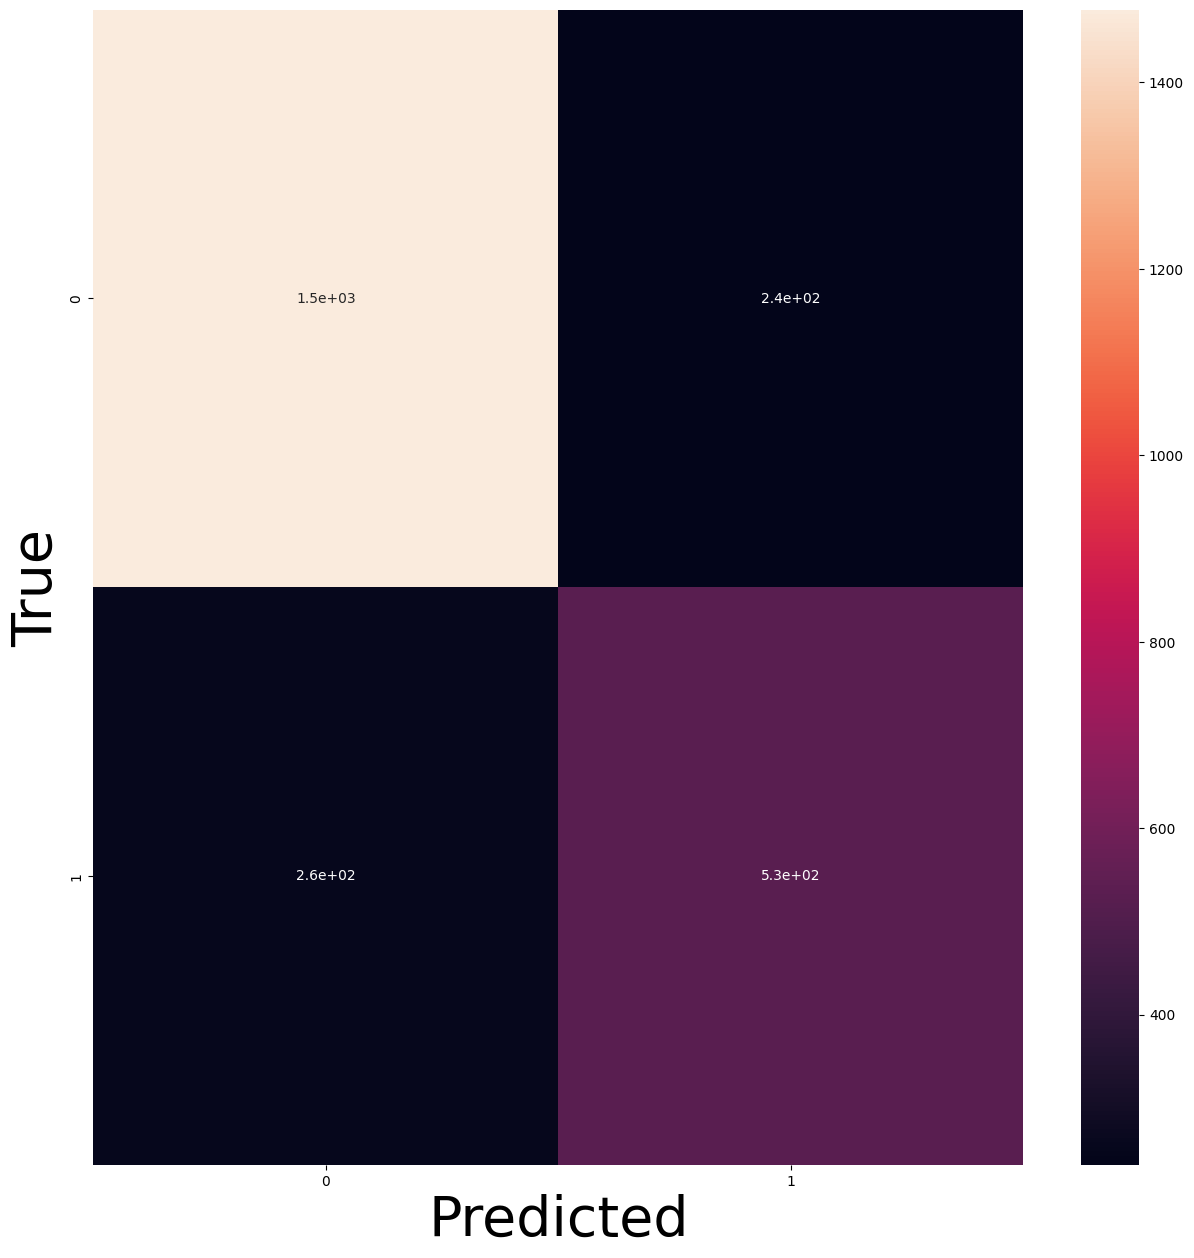

CPU times: user 2.17 s, sys: 358 ms, total: 2.53 s
Wall time: 1.75 s


In [175]:
%%time
# evaluate the pipeline

eval_classification(knn_pca_pipe, X_train, X_test, y_train, y_test)


## 4.4 Features

In [176]:
df_car_insurance['education_income'] = df_car_insurance['education'] + " " + df_car_insurance['income'].astype('string')
df_car_insurance.drop(columns=['gender','age'], inplace=True)
df_car_insurance.drop(columns=['education','income'], inplace=True)
df_car_insurance.head()

,race,driving_experience,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome,education_income
0,majority,0-9y,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0,high school upper class
1,majority,0-9y,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0,none poverty
2,majority,0-9y,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0,high school working class
3,majority,0-9y,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0,university working class
4,majority,10-19y,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0,none working class
